In [26]:
#==============================================================================
# CellStrat Hub Pack - Natural Language Processing
# Compatible tier : Free Tier or above 
# Kernel : conda_pytorch_latest_p36 
#==============================================================================

In [27]:
# -*- coding: utf-8 -*-

#==============================================================================
# Import libraries
#==============================================================================

import numpy as np
import pandas as pd
import os
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to /home/ec2-user/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [29]:
#==============================================================================
# Gensim is an open-source library for unsupervised natural language processing, 
#using modern statistical machine learning.

#Gensim is implemented in Python and Cython for performance. 
#https://radimrehurek.com/gensim/
#==============================================================================
!python -m pip install -U gensim

In [30]:
#==============================================================================
# Import gensim package 
#==============================================================================
import gensim

In [31]:
#==============================================================================
# Import brown corpus
# Import word2vec package
# Multiprocessing can be implemented for parallel processing
#==============================================================================
from nltk.corpus import brown
from gensim.models import Word2Vec
import multiprocessing

In [32]:
#==============================================================================
# Brown corpus has sequences split into the tokens
#==============================================================================
sentences=brown.sents()
print(sentences[:2])

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.']]


In [33]:
#==============================================================================
# Different genres of the corpus can be displayed
#==============================================================================
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [34]:
#==============================================================================
# The corpus size can be obtained ~11 lakhs words
#==============================================================================
count=0
for words in brown.words():
    count=count+1
print("The count of the words in Brown Corpus",count)

The count of the words in Brown Corpus 1161192


In [35]:
#==============================================================================
# The corpus size can be obtained ~11 lakhs words
#==============================================================================
#use word2vec for training the embeddings

#define the parameters for word2Vec :
#size : size of the embedding dimensions
#min_count: the threshold of min fequency above which the embeddings will be applied
#negative : Negative samples drawn for every correct sample
#workers : Worker threads for training the model
#The initialization parameter sg controls the mode. If True-ish (sg=1), skip-gram is used; if False-ish (sg=0), CBOW is used


In [36]:
#==============================================================================
# Train the model
#==============================================================================

w2v = Word2Vec(sentences,vector_size=300,min_count=5,negative=15,workers=multiprocessing.cpu_count(),sg=1,seed=42)



In [37]:
#==============================================================================
# save and load the model
# The model is saved in the Hub memory
#==============================================================================
w2v.save("Word2Vec.model")
w2v=Word2Vec.load("Word2Vec.model")

In [38]:
#==============================================================================
# w2v.wv has the list of embedding matrix 
# Stores the list of vector representations for each of the words
# Print a sample word vector
#Compare this with original vocab size of ~1161192
#1.3% of original vocabulary is retained
#==============================================================================
word_vectors=w2v.wv
print("The number of words in embedding matrix",len(word_vectors))
print(word_vectors[0])

The number of words in embedding matrix 15173
[-1.83812544e-01  2.11490959e-01 -2.14494780e-01  1.11153193e-01
  1.22325517e-01  7.87727460e-02 -9.17806476e-02 -1.25275165e-01
 -1.20186687e-01 -2.40724772e-01  1.42199069e-01  5.67436814e-02
 -8.01362563e-03  1.39972493e-01  5.49695082e-02  1.36133969e-01
  2.25059286e-01  4.56306618e-03 -1.81757682e-03 -1.00709632e-01
  2.26080060e-01 -2.25542262e-02 -1.58138588e-01  1.17668644e-01
 -4.96188831e-03  1.89685091e-01  1.14145473e-01 -4.23602154e-03
 -2.00744733e-01  1.36015490e-01 -1.93330735e-01 -5.11481881e-01
 -2.89411873e-01 -1.19761331e-02 -1.24086834e-01  2.80533910e-01
 -9.84522980e-03 -7.19488710e-02  5.32892533e-02  8.30593184e-02
  4.10360843e-02 -1.05359321e-02  7.28173032e-02  7.81364217e-02
 -1.32658631e-01 -5.27411774e-02 -3.23433131e-02 -4.04407419e-02
  6.33457452e-02  1.26460224e-01 -2.53575951e-01 -2.90799469e-01
 -2.97045652e-02 -9.67739746e-02 -7.23196864e-02 -1.63426753e-02
  2.64977038e-01  1.23965956e-01  1.89736053

In [39]:
#==============================================================================
# word_vectors has list of vectors against the words
# It is keyedvector type .'gensim.models.keyedvectors.KeyedVectors'
# Stores the list of vector representations for each of the keys ( Keys are in general words)
# word_vectors.index_to_key returns the keys 
#==============================================================================
vocab=list(word_vectors.index_to_key)
print(vocab)


['the', ',', '.', 'of', 'and', 'to', 'a', 'in', 'that', 'is', 'was', 'for', '``', "''", 'The', 'with', 'it', 'as', 'he', 'his', 'on', 'be', ';', 'I', 'by', 'had', 'at', '?', 'not', 'are', 'from', 'or', 'this', 'have', 'an', 'which', '--', 'were', 'but', 'He', 'her', 'one', 'they', 'you', 'all', 'would', 'him', 'their', 'been', ')', '(', 'has', 'will', 'who', 'more', 'out', 'It', 'we', 'she', 'said', 'there', 'up', 'In', ':', 'than', 'them', 'into', 'no', 'its', 'about', 'so', 'when', 'can', 'only', 'other', '!', 'could', 'time', 'if', 'what', 'some', 'But', 'A', 'two', 'any', 'may', 'do', 'first', 'like', 'these', 'over', 'such', 'This', 'me', 'my', 'man', 'our', 'made', 'new', 'most', 'now', 'then', 'must', 'also', 'Af', 'did', 'even', 'back', 'before', 'years', 'through', 'And', 'many', 'She', 'much', 'way', 'down', 'your', 'should', 'There', 'where', 'They', 'Mr.', 'after', 'because', 'people', 'too', 'little', 'those', 'very', 'own', 'make', 'good', 'each', 'well', 'work', 'just', 

In [40]:
#==============================================================================
# Index represents the word serial number assigned by gensim 
# In general,it is assigned by the frequency
# word_vectors.get_index returns the index of the word
#==============================================================================
for i in vocab:
    print("The index of " ,"\"",i,"\"","is",word_vectors.get_index(i))


The index of  " the " is 0
The index of  " , " is 1
The index of  " . " is 2
The index of  " of " is 3
The index of  " and " is 4
The index of  " to " is 5
The index of  " a " is 6
The index of  " in " is 7
The index of  " that " is 8
The index of  " is " is 9
The index of  " was " is 10
The index of  " for " is 11
The index of  " `` " is 12
The index of  " '' " is 13
The index of  " The " is 14
The index of  " with " is 15
The index of  " it " is 16
The index of  " as " is 17
The index of  " he " is 18
The index of  " his " is 19
The index of  " on " is 20
The index of  " be " is 21
The index of  " ; " is 22
The index of  " I " is 23
The index of  " by " is 24
The index of  " had " is 25
The index of  " at " is 26
The index of  " ? " is 27
The index of  " not " is 28
The index of  " are " is 29
The index of  " from " is 30
The index of  " or " is 31
The index of  " this " is 32
The index of  " have " is 33
The index of  " an " is 34
The index of  " which " is 35
The index of  " -- " i

In [41]:
#==============================================================================
# Get the sample vector for a given word/token
#==============================================================================

word_vectors.get_vector('the')

array([-1.83812544e-01,  2.11490959e-01, -2.14494780e-01,  1.11153193e-01,
        1.22325517e-01,  7.87727460e-02, -9.17806476e-02, -1.25275165e-01,
       -1.20186687e-01, -2.40724772e-01,  1.42199069e-01,  5.67436814e-02,
       -8.01362563e-03,  1.39972493e-01,  5.49695082e-02,  1.36133969e-01,
        2.25059286e-01,  4.56306618e-03, -1.81757682e-03, -1.00709632e-01,
        2.26080060e-01, -2.25542262e-02, -1.58138588e-01,  1.17668644e-01,
       -4.96188831e-03,  1.89685091e-01,  1.14145473e-01, -4.23602154e-03,
       -2.00744733e-01,  1.36015490e-01, -1.93330735e-01, -5.11481881e-01,
       -2.89411873e-01, -1.19761331e-02, -1.24086834e-01,  2.80533910e-01,
       -9.84522980e-03, -7.19488710e-02,  5.32892533e-02,  8.30593184e-02,
        4.10360843e-02, -1.05359321e-02,  7.28173032e-02,  7.81364217e-02,
       -1.32658631e-01, -5.27411774e-02, -3.23433131e-02, -4.04407419e-02,
        6.33457452e-02,  1.26460224e-01, -2.53575951e-01, -2.90799469e-01,
       -2.97045652e-02, -

In [42]:
#==============================================================================
# Application of Word2Vec
# Similar words
# disimilar words
# odd one out
#==============================================================================

result=word_vectors.similar_by_word("Saturday")
print("Most similar words to 'Saturday':\n",result[:3])

result=word_vectors.similar_by_word("money")
print("Most similar words to 'Money':\n",result[:3])

result=word_vectors.similar_by_word("child")
print("Most similar words to 'child':\n",result[:3])

result=word_vectors.most_similar(positive=['child'],negative=['person'])
print("Most similar words to 'child' but dissimilar to 'person':\n",result[:3])

result = word_vectors.doesnt_match("Saturday Wednesday Food".split())
print("Odd man out:\n",result)

result = word_vectors["child"]
print("Numy vector rep for the word child is :\n",result)

Most similar words to 'Saturday':
 [('Monday', 0.9273626208305359), ('Wednesday', 0.926136314868927), ('Sunday', 0.918364942073822)]
Most similar words to 'Money':
 [('nurse', 0.7996196746826172), ('excuse', 0.7957415580749512), ('chances', 0.7954564690589905)]
Most similar words to 'child':
 [('artist', 0.8243935108184814), ('teacher', 0.8240503072738647), ('autistic', 0.8060576319694519)]
Most similar words to 'child' but dissimilar to 'person':
 [('your', 0.23273254930973053), ('husband', 0.21889980137348175), ('medical', 0.21564368903636932)]
Odd man out:
 Food
Numy vector rep for the word child is :
 [-4.45387885e-02 -1.84206858e-01 -2.73838341e-01 -1.37469713e-02
 -2.12787203e-02 -2.28954181e-01 -1.57758966e-01  9.14450660e-02
 -1.83527708e-01 -5.20569645e-02  3.14224571e-01 -1.08795077e-01
  1.88756213e-02 -1.74318716e-01 -1.14792669e-02  3.68128717e-02
  1.31266817e-01 -1.59387309e-02 -1.86757579e-01 -7.79018849e-02
  4.76473838e-01  6.91148732e-03 -6.59186095e-02 -8.37647170e-

# T distrbuted stochastic neigbour embedding Visualzation

In [43]:
#==============================================================================
# Visualization in 2D format
# Only first 100 samples are represented for convenience
#==============================================================================
X_pca=word_vectors.vectors[0:100]

from sklearn.manifold import TSNE
import pandas as pd
tsne=TSNE(n_components=2).fit_transform(X_pca)
tsne.shape

(100, 2)

In [44]:
df = pd.DataFrame(tsne, index=vocab[:100],columns=['X','Y'])

In [45]:
#==============================================================================
# View the data frame
#==============================================================================
df

,X,Y
the,-16.506693,-13.457912
",",18.639500,11.222013
.,10.318083,37.727940
of,-40.922291,1.208772
and,-4.860975,11.446241
...,...,...
man,124.092216,3.373534
our,49.336010,-113.889214
made,-93.598183,-25.470415
new,-73.453041,-0.136456


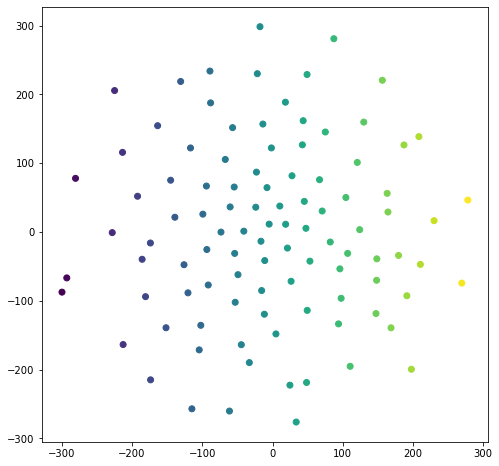

In [46]:
#==============================================================================
# Visualize the plot
#=========================================================================
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8, 8))
ax=fig.add_subplot(111)
ax.scatter(df['X'],df['Y'],c=df['X'])
plt.show()

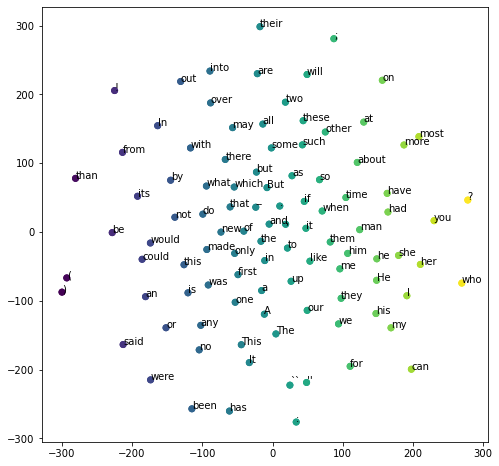

In [47]:
#========================================================================
# Visualize the plot with data labels
#=========================================================================
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8, 8))
ax=fig.add_subplot(111)
#%matplotlib inline
ax.scatter(df['X'],df['Y'],c=df['X'])
#label the data
#ax.set_xlim(-20,20)
#ax.set_ylim(-20,20)
#plt.show()
for word,pos in df.iterrows():
    ax.annotate(word,pos)
ax.scatter(df['X'],df['Y'],c=df['X'])
plt.show()